In [ ]:
from pylab import *
from numba import cuda
import numba as nb

In [ ]:
@cuda.jit # This is a kernel
def increment_by_1(array):
  tx = cuda.threadIdx.x
  bx = cuda.blockIdx.x
  bw = cuda.blockDim.x
  pos = tx + bw*bx # "global index"
  array[pos] += 1

In [ ]:
N = 4096
g = zeros(N)
g_device = cuda.to_device(g)
total_number_of_blocks = N//64
block_width = 64
increment_by_1[total_number_of_blocks, block_width](g_device)

In [ ]:
%timeit increment_by_1[total_number_of_blocks, block_width](g)
%timeit increment_by_1[total_number_of_blocks, block_width](g_device)
%timeit g_device = cuda.to_device(g)

/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/devicearray.py:886: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


414 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
33.7 µs ± 869 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
224 µs ± 3.03 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# it works.
g_device[:] = 0
total_number_of_blocks = N//64 + 1
block_width = 64
increment_by_1[total_number_of_blocks, block_width](g_device)
print(g_device.copy_to_host())

[1. 1. 1. ... 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 63 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


In [ ]:
# if guards are needed
@cuda.jit # This is a kernel
def increment_by_1(array):
  tx = cuda.threadIdx.x
  bx = cuda.blockIdx.x
  bw = cuda.blockDim.x
  pos = tx + bw*bx # "global index"
  if pos < array.size:
    array[pos] += 1

In [ ]:
# it works.
g_device[:] = 0
total_number_of_blocks = N//64
block_width = 64
increment_by_1[total_number_of_blocks, block_width](g_device)
print(g_device.copy_to_host())

[1. 1. 1. ... 1. 1. 1.]


/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


In [ ]:
N = int(2**20)
g = zeros(N)
g_device = cuda.to_device(g)
for i in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:
  total_number_of_blocks = N//i
  block_width = i
  %timeit increment_by_1[total_number_of_blocks, block_width](g_device)

1.24 ms ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
620 µs ± 1.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
318 µs ± 42.1 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
178 µs ± 22 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
93.8 µs ± 184 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
70.6 µs ± 4.29 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
70.1 µs ± 3.14 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
69.9 µs ± 2.76 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
70 µs ± 4.06 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
70.1 µs ± 5.4 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


ERROR:numba.cuda.cudadrv.driver:Call to cuLaunchKernel results in CUDA_ERROR_INVALID_VALUE


70.2 µs ± 9.06 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


CudaAPIError: [1] Call to cuLaunchKernel results in CUDA_ERROR_INVALID_VALUE

In [ ]:
# if guards are needed
@cuda.jit # This is a kernel
def increment_by_1_slow(array):
  tx = cuda.threadIdx.x
  bx = cuda.blockIdx.x
  bw = cuda.blockDim.x
  pos = tx + bw*bx # "global index"
  if pos < array.size:
    array[pos] += 3
    array[pos] -= 7
    array[pos] *= 4
    array[pos] += 17
    array[pos] += 3
    array[pos] -= 7
    array[pos] *= 4
    array[pos] += 17
    array[pos] += 3
    array[pos] -= 7
    array[pos] *= 4
    array[pos] += 17
    array[pos] += 3
    array[pos] -= 7
    array[pos] *= 4
    array[pos] += 17
    array[pos] += 3
    array[pos] -= 7
    array[pos] *= 4
    array[pos] += 17

In [ ]:
total_number_of_blocks = N//64
block_width = 64
# compilation call
increment_by_1[total_number_of_blocks, block_width](g_device)
increment_by_1_slow[total_number_of_blocks, block_width](g_device)

%timeit increment_by_1[total_number_of_blocks, block_width](g_device)
%timeit increment_by_1_slow[total_number_of_blocks, block_width](g_device)


89.3 µs ± 25.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
153 µs ± 441 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%timeit increment_by_1[total_number_of_blocks, block_width](g_device)
%timeit increment_by_1_slow[total_number_of_blocks, block_width](g_device)


69.9 µs ± 40.2 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
150 µs ± 294 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
h = zeros((4000, 4000))
h_device = cuda.to_device(h)

In [ ]:
# if guards are needed
@cuda.jit # This is a kernel
def increment_by_1_2D_old_school(array):
  tx = cuda.threadIdx.x
  bx = cuda.blockIdx.x
  bw = cuda.blockDim.x
  pos = tx + bw*bx # "global index"
  i = pos // array.shape[1]
  j = pos % array.shape[1]
  if pos < array.size:
    array[i, j] += 1

@cuda.jit # This is a kernel
def increment_by_1_2D_old_school_slow(array):
  tx = cuda.threadIdx.x
  bx = cuda.blockIdx.x
  bw = cuda.blockDim.x
  pos = tx + bw*bx # "global index"
  i = pos // array.shape[1]
  j = pos % array.shape[1]
  if pos < array.size:
    array[j, i] += 1


@cuda.jit # This is a kernel
def increment_by_1_2D_grid(array):
  tx = cuda.threadIdx.x
  bx = cuda.blockIdx.x
  bwx = cuda.blockDim.x
  ty = cuda.threadIdx.y
  by = cuda.blockIdx.y
  bwy = cuda.blockDim.y
  j = ty + bwy*by
  i = tx + bwx*bx # this always goes with the fastest changing index
  if (j < array.shape[0]) and (i < array.shape[1]):
    array[j, i] += 1

In [ ]:
%timeit increment_by_1_2D_old_school[total_number_of_blocks, block_width](h_device)
# %timeit increment_by_1_2D_old_school_slow[total_number_of_blocks, block_width](h_device)
%timeit increment_by_1_2D_grid[(4096//8, 4096//8), (8, 8)](h_device)

70.2 µs ± 30.8 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
205 µs ± 566 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
The slowest run took 4.77 times longer than the fastest. This could mean that an intermediate result is being cached.
59.1 µs ± 45.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
Nk, Nx = 65536, 256
f = randn(Nx, Nk)
fT, uT = f.T.copy(), u.T.copy()

u = zeros((Nx, Nk))
f_device = cuda.to_device(f)
u_device = cuda.to_device(u)

fT_device = cuda.to_device(fT)
uT_device = cuda.to_device(uT)

x = linspace(0, 1, Nx)
dx = x[1] - x[0]
dx2_host = dx*2
dx2_device = cuda.to_device([dx2_host])

@cuda.jit
def heat(u, f, dx2):
  tx = cuda.threadIdx.x
  bx = cuda.blockIdx.x
  bw = cuda.blockDim.x
  i = tx + bx*bw
  if i < u.shape[1]:
    for k in range(6000):
      for j in range(1, u.shape[0]-1):
        ul = u[j-1, i]
        ur = u[j+1, i]
        fji = f[j, i]
        u[j, i] = 0.5*(ul + ur - dx2[0]*fji)

@cuda.jit
def heat_T(u, f, dx2):
  tx = cuda.threadIdx.x
  bx = cuda.blockIdx.x
  bw = cuda.blockDim.x
  i = tx + bx*bw
  if i < u.shape[0]:
    for k in range(6000):
      for j in range(1, u.shape[1]-1):
        ul = u[i, j-1]
        ur = u[i, j+1]
        fji = f[i, j]
        u[i, j] = 0.5*(ul + ur - dx2[0]*fji)

# NOTE: In CPU the optimal axis order is the opposite
@nb.njit(parallel=True)
def heat_cpu(u, f, dx2):
  for i in nb.prange(u.shape[0]):
    for k in range(6000):
      for j in range(1, u.shape[1]):
        ul = u[i, j-1]
        ur = u[i, j+1]
        fji = f[i, j]
        u[i, j] = 0.5*(ul + ur - dx2*fji)

In [ ]:
%time heat[Nk//64, 64](u_device, f_device, dx2_device)
%time heat_T[Nk//64, 64](uT_device, fT_device, dx2_device)
%time heat_cpu(uT, fT, dx2_host)

CPU times: user 176 ms, sys: 6.98 ms, total: 183 ms
Wall time: 182 ms


NameError: name 'heatT' is not defined

KeyboardInterrupt: 

In [ ]:
u_sol = u_device.copy_to_host()

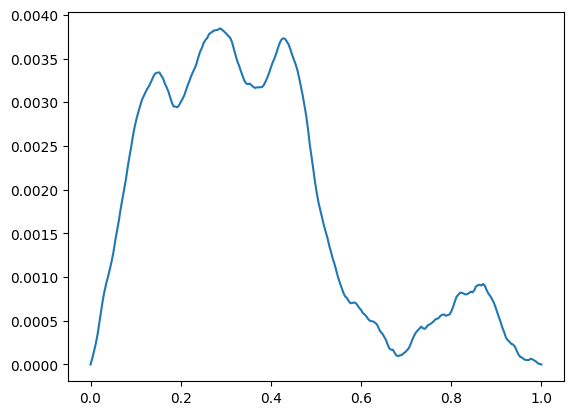

In [ ]:
close("all")
# plot(x, f[:, 0])
plot(x, u_sol[:, 0])

In [ ]:
u_sol[:, 10]

array([  0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -i